In [ ]:
# relevant imports
import time
import torch
from torch import nn
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, balanced_accuracy_score
from torchvision.datasets import MNIST
from torchsummary import summary

In [ ]:
# which device were on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


**Set data:**

In [ ]:
#set parameters
num_images = 60000
batch_size = 50
num_baches = 13000
num_epochs = int((batch_size*num_baches)/num_images)
train_times = []

# take the train data, split it to train and validation, then create matching loaders from the subsets
transform = transforms.Compose([transforms.ToTensor(), 
                                        transforms.Normalize((0.5,), (0.5,))])
dataset = MNIST(root = './data', train = True, transform = transform, download=True)

train_set, val_set = torch.utils.data.random_split(dataset, [54000, 6000])

X_train = train_set.dataset.data[train_set.indices]
y_train = train_set.dataset.targets[train_set.indices]

X_val = val_set.dataset.data[val_set.indices]
y_val = val_set.dataset.targets[val_set.indices]

train_images = X_train / 255. # save for later plotting
train_labels = y_train

validation_images = X_val / 255. # save for later plotting
validation_labels = y_val

train_loader_50batch = torch.utils.data.DataLoader(dataset=train_set, shuffle=True, batch_size=batch_size)
val_loader_50batch = torch.utils.data.DataLoader(dataset=val_set, shuffle=False, batch_size=batch_size)

train_loader_100batch = torch.utils.data.DataLoader(dataset=train_set, shuffle=True, batch_size=batch_size + 50)
val_loader_100batch = torch.utils.data.DataLoader(dataset=val_set, shuffle=False, batch_size=batch_size + 50)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# create test loader
dataset = MNIST(root = './data', train = False, transform = transform, download=True)
test_set, null_set = torch.utils.data.random_split(dataset, [10000, 0])

X_test = train_set.dataset.data[test_set.indices]
y_test = train_set.dataset.targets[test_set.indices]

test_images = X_test / 255. # save for later plotting
test_labels = y_test

test_loader_50batch = torch.utils.data.DataLoader(dataset=test_set, shuffle=True, batch_size=batch_size)
test_loader_100batch = torch.utils.data.DataLoader(dataset=test_set, shuffle=True, batch_size=batch_size + 50)

**Part I :**

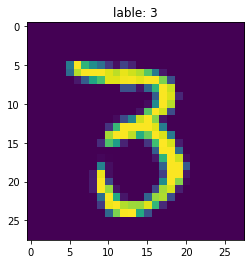

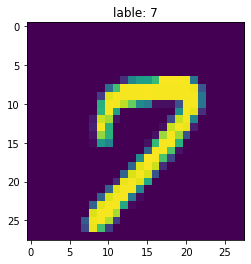

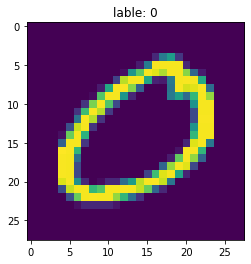

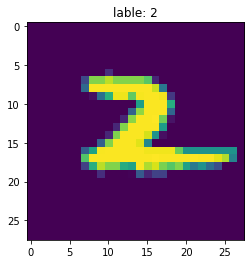

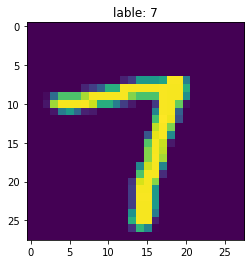

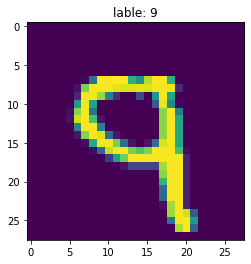

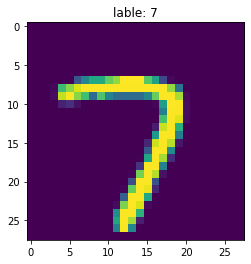

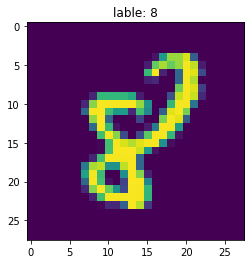

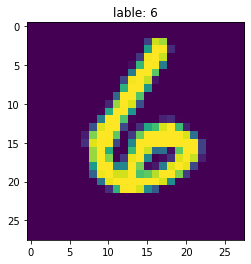

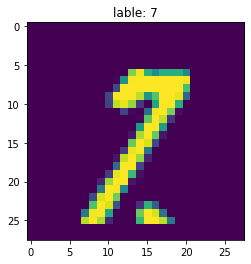

In [ ]:
# print a sample of our inputs
sample_size = 10
for i in range(sample_size):
  plt.figure()
  imgplot = plt.imshow(train_images[i])
  # x = torch.reshape(train_images[i],(1,1,28,28))
  plt.title("lable: " + str(train_labels.float()[i])[-3:-2] )

In [ ]:
# create models

# model with no hidden layers
model1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 10), # 784 inputs  connect stright to the 10 output
)
# model with 2 hidden layers, 200 neurons each with ReLu activation func
model2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 200), # input layer to hidden layer 1
    nn.ReLU(),
    nn.Linear(200, 200), # hidden layer 1 to hidden layer 2
    nn.ReLU(),
    nn.Linear(200, 10)   # hidden layer 2 to ouput layer
)

lr = 0.01

In [ ]:
# train models

def train_models(models, loader):
  for model in models:
    
    model.to(device)
    # optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss = torch.nn.CrossEntropyLoss()
    
    start = time.time()
    for epoch in range(num_epochs):
      print("epoch ", epoch + 1, ":")
      for batch_idx, (images, labels) in enumerate(loader):
        images = images/255
        # print(images)
        # print(labels)
        # print(model(images)[0])
        # input()
        cross_entropy = loss(model(images), labels)
        if not (batch_idx % 100):
          print(cross_entropy.detach().numpy())

        # zero gradients berfore running the backward pass
        optimizer.zero_grad()

        # backward pass to compute the gradient of loss
        # backprop + accumulate 
        cross_entropy.backward()

        # update params
        optimizer.step()

    end = time.time()
    print("Final train CE: ", loss(model(images), labels).detach().numpy())
    print("Train Time "+str(end-start))
    print("-------------------------------------------------------------")


models=[model1, model2]
train_models(models, train_loader_50batch) 

epoch  1 :
2.3043509
2.0449078
1.8504055
1.6317269
1.5420908
1.4728949
1.3114026
1.0704159
1.0571828
1.0797839
0.9684528
epoch  2 :
0.97433144
0.93245226
0.86978483
0.76958257
0.85795355
0.7161957
0.62431216
0.6210825
0.60056937
0.68934137
0.787157
epoch  3 :
0.553266
0.53965557
0.57129514
0.6482907
0.5475061
0.7030072
0.50907594
0.5591377
0.6574051
0.64179206
0.489052
epoch  4 :
0.6109998
0.57325387
0.5667584
0.5636488
0.38751197
0.35078058
0.39413148
0.4066166
0.49853185
0.35709372
0.4130888
epoch  5 :
0.43040463
0.6043246
0.7140501
0.4080358
0.46348044
0.5470139
0.3776394
0.5025792
0.399219
0.4246911
0.40693092
epoch  6 :
0.47980756
0.39645806
0.61182743
0.5993315
0.50186676
0.4087203
0.43512002
0.34420708
0.55375075
0.36289498
0.4264003
epoch  7 :
0.41251457
0.517248
0.3572246
0.29427722
0.30434802
0.25651643
0.40922096
0.27159843
0.4548312
0.44368526
0.42298076
epoch  8 :
0.19877672
0.45586067
0.43019035
0.6167568
0.3550427
0.3359187
0.38718215
0.43660152
0.38713616
0.34199023
0.2

**Validate the model (in batches):**

In [ ]:
def get_mean_of_batches_models(models, loader):
  accuracies = [[],[]]
  accuracies_means = []
  for model in models:
    for batch_idx, (images, labels) in enumerate(loader):
      images = images/255 # normalization
      correct_prediction = (torch.argmax(model(images),1) == labels).type(torch.float32)
      accuracies[(models.index(model))].append(torch.mean(correct_prediction))
      if batch_idx == 200: # validation on only 10000 images (like the test size)
        break
    accuracies_means.append(sum(accuracies[(models.index(model))])/ len(accuracies[(models.index(model))]))
    print("----- Model No."+ str(models.index(model)+1) +" -----")
    print("mean of accuracies in all batches (not the general accuracy of the model): "+ str(accuracies_means[(models.index(model))]))


print("Validation:")
get_mean_of_batches_models(models, val_loader_50batch)    

Validation:
----- Model No.1 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9000)
----- Model No.2 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9668)


# Evaluating the results:

the method of parameters calculation (as shown in calss) through batchs isn't healthy for our calculation since not all batches will contain all possible outputs then for parameters like f_score sk.metrics will assume a value of 0.0

therefore we shall add a general calcuation that will be taken apon all of our set of data at once (per set type).

In [ ]:
print("Test:")
get_mean_of_batches_models(models, test_loader_50batch) 

Test:
----- Model No.1 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9062)
----- Model No.2 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9662)


In [ ]:
# relevant function
def predict(trained_model, x, t):
  prediction = torch.argmax(trained_model(x),1)
  # correction_table = (prediction == target).type(torch.float32)
  return score(prediction, t)

def score(prediction, target):
  p_score = precision_score(target, prediction, average='micro')
  r_score = recall_score(target, prediction, average='micro')
  f_score = f1_score(target, prediction, average='micro')
  acc_score = accuracy_score(target, prediction)
  bal_acc = balanced_accuracy_score(prediction, target)
  return p_score, r_score, f_score, acc_score, bal_acc

In [ ]:
# show model
def show_model_info(model, x, t):
  p_score, r_score, f_score, acc_score, bal_acc = predict(model, x, t)
  print("p_score = "+ str(p_score))
  print("r_score = "+ str(r_score))
  print("f1_score = "+ str(f_score))
  print("acc_score = "+ str(acc_score))
  print("balance acc= "+ str(bal_acc))

In [ ]:
print("------------------------------ Parameters After Training ------------------------------")
for model in models:
  print("\n------------------------ Model NO. "+ str(models.index(model) + 1)+"------------------------")
  summary(model, (1,28,28))
  print("\ntrain:")
  show_model_info(model, train_images, train_labels)
  print("\nvalidation:")
  show_model_info(model, validation_images, validation_labels)
  print("\ntest:")
  show_model_info(model, test_images, test_labels)

------------------------------ Parameters After Training ------------------------------

------------------------ Model NO. 1------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                   [-1, 10]           7,850
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------

train:
p_score = 0.7981481481481482
r_score = 0.7981481481481482
f1_score = 0.7981481481481482
acc_score = 0.7981481481481482
balance acc= 0.8724742459976905

validation:
p_score = 0.7965
r_score = 0.7965
f1_score = 0.7965
acc_score = 0.7965
balance acc= 0.8694079072222239

test


we could continue to train the models if the results are not satisfactory


**Now lets see examples where our models failed to classify the images**:

----- Model No.1 -----


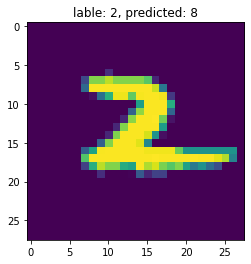

In [ ]:
sample_size = 10

print("----- Model No.1 -----")
for i in range(sample_size):
  x = torch.reshape(train_images[i],(1,1,28,28))
  y_softmax = model1(x)
  y = torch.argmax(y_softmax, 1) # .value()
  if y != int(str(train_labels.float()[i])[-3:-2]):
    plt.figure()
    imgplot = plt.imshow(train_images[i])
    plt.title("lable: " + str(train_labels.float()[i])[-3:-2] + ", predicted: " + str(y)[-3:-2])

----- Model No.2 -----


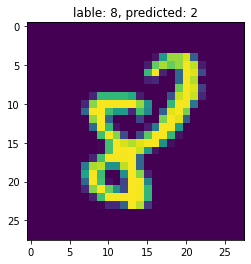

In [ ]:
print("----- Model No.2 -----")
for i in range(sample_size):
  x = torch.reshape(train_images[i],(1,1,28,28))
  y_softmax = model2(x)
  y = torch.argmax(y_softmax, 1) # .value()
  if y != int(str(train_labels.float()[i])[-3:-2]):
    plt.figure()
    imgplot = plt.imshow(train_images[i])
    plt.title("lable: " + str(train_labels.float()[i])[-3:-2] + ", predicted: " + str(y)[-3:-2])

**Part II :**

In [ ]:
# for debuging
global_conv1_out = 0
class PrintLayer(nn.Module):
    def __init__(self, layer_out, image=0):
        super(PrintLayer, self).__init__()
        self.image = image
        self.layer_out = layer_out
    
    def forward(self, x):
        # Do your print / debug stuff here
        # imgplot = plt.imshow(x.cpu().detach().numpy()[0][0])
        
        self.layer_out = torch.clone(x[self.image])
        return x # forward needs to be transparent

In [ ]:
#  get model prediction
def convo_predicted(pre_tens):
  score, predicted = torch.max(y, 1)
  return predicted

# acc cal
def accuracy(y, t):
  score, predicted = torch.max(y, 1)
  acc = (t == predicted).sum().float() / len(t)
  return acc

# hooks for convolution visualization
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [ ]:
Dropoutֹֹֹֹֹֹֹ_rate = 0.3

model3 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(5,5), stride=(1,1), padding='same'),
    # PrintLayer(),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5,5), stride=(1,1), padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
    nn.Flatten(),
    nn.Dropout(p=Dropoutֹֹֹֹֹֹֹ_rate),
    nn.Linear(in_features=64*7*7, out_features=1024),
    nn.ReLU(),    
    nn.Linear(in_features=1024, out_features=10)
  )

model4 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(5,5), stride=(1,1), padding='same'),
    # PrintLayer(),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
    nn.Flatten(),
    nn.Dropout(p=Dropoutֹֹֹֹֹֹֹ_rate),
    nn.Linear(in_features=32*14*14, out_features=1024),
    nn.ReLU(),    
    nn.Linear(in_features=1024, out_features=10)
   
  )


def init_conv2d_weights(m):
    if isinstance(m, nn.Conv2d):
        nn.init.xavier_normal_(m.weight)
        m.weight = nn.Parameter(torch.abs(m.weight))
        m.bias.data.fill_(0.01)


In [ ]:
print('Model 3:')
model3.apply(init_conv2d_weights)
print(model3)
print(model3[0].weight.data.shape)
print(model3[3].weight.data.shape)
print('\nModel 4:')
model4.apply(init_conv2d_weights)
print(model4)
print(model4[0].weight.data.shape)

model3[0].register_forward_hook(get_activation('model3_conv1'))
model3[1].register_forward_hook(get_activation('model3_conv1_Relu'))
model3[3].register_forward_hook(get_activation('model3_conv2'))
model3[5].register_forward_hook(get_activation('model3_conv2_maxpooled'))

model4[0].register_forward_hook(get_activation('model4_conv1'))
model4[1].register_forward_hook(get_activation('model4_conv1_Relu'))
model4[2].register_forward_hook(get_activation('model4_conv1_maxpooled'))

convo_models = [model3, model4]

Model 3:
Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Dropout(p=0.3, inplace=False)
  (8): Linear(in_features=3136, out_features=1024, bias=True)
  (9): ReLU()
  (10): Linear(in_features=1024, out_features=10, bias=True)
)
torch.Size([32, 1, 5, 5])
torch.Size([64, 32, 5, 5])

Model 4:
Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Dropout(p=0.3, inplace=False)
  (5): Linear(in_features=6272, out_features=1024, bias=True)
  (6): ReLU()
  (7):

In [ ]:
lr = 1e-3
loss = torch.nn.CrossEntropyLoss()
num_epochs = 2
optimizers = [torch.optim.Adam(model3.parameters(), lr=lr), torch.optim.Adam(model4.parameters(), lr=lr)]
train_times = []

def train_convo_models(models, loader):
  for model in convo_models:
    model.to(device)
    start = time.time()
    for epoch in range(num_epochs):
      print("epoch ", epoch + 1, ":")
      for batch_idx, (images, labels) in enumerate(loader):
        images = images/255
        images, labels = images.to(device), labels.to(device)

        predictions = model(images)
        cross_entropy = loss(predictions, labels)
        if not (batch_idx % 100):
          print("CE: %.6f, ACC: %.3f" % (cross_entropy.item(), accuracy(predictions, labels).item()))

        optimizers[convo_models.index(model)].zero_grad()
        cross_entropy.backward()
        optimizers[convo_models.index(model)].step()

    end = time.time()
    print("Final train step - CE: %.6f, ACC: %.3f" % (cross_entropy.item(), accuracy(predictions, labels).item()))
    train_times.append(end-start)
    print("-------------------------------------------------------------")

train_convo_models(convo_models, train_loader_50batch)

epoch  1 :
CE: 2.298827, ACC: 0.140
CE: 0.839790, ACC: 0.720
CE: 0.875383, ACC: 0.780
CE: 0.514589, ACC: 0.800
CE: 0.389661, ACC: 0.880
CE: 0.319993, ACC: 0.940
CE: 0.274616, ACC: 0.900
CE: 0.247831, ACC: 0.920
CE: 0.232263, ACC: 0.920
CE: 0.150091, ACC: 0.940
CE: 0.110014, ACC: 0.980
epoch  2 :
CE: 0.135973, ACC: 0.940
CE: 0.179059, ACC: 0.940
CE: 0.294930, ACC: 0.920
CE: 0.098377, ACC: 0.960
CE: 0.131218, ACC: 0.960
CE: 0.122519, ACC: 0.960
CE: 0.069491, ACC: 0.980
CE: 0.065155, ACC: 0.980
CE: 0.244727, ACC: 0.920
CE: 0.097302, ACC: 0.980
CE: 0.048673, ACC: 0.980
Final train step - CE: 0.228281, ACC: 0.940
-------------------------------------------------------------
epoch  1 :
CE: 2.304712, ACC: 0.060
CE: 0.780569, ACC: 0.800
CE: 0.412158, ACC: 0.920
CE: 0.795228, ACC: 0.800
CE: 0.326591, ACC: 0.900
CE: 0.364447, ACC: 0.880
CE: 0.339692, ACC: 0.860
CE: 0.150676, ACC: 0.980
CE: 0.147593, ACC: 0.960
CE: 0.377837, ACC: 0.900
CE: 0.282450, ACC: 0.940
epoch  2 :
CE: 0.233971, ACC: 0.920


In [ ]:
print("Validation:")
get_mean_of_batches_models(convo_models, val_loader_50batch)    

Validation:
----- Model No.1 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9637)
----- Model No.2 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9443)


In [ ]:
print("Test:")
get_mean_of_batches_models(convo_models, test_loader_50batch)   

Test:
----- Model No.1 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9646)
----- Model No.2 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9479)


In [ ]:
def convo_predict_through_batches(trained_model, loader):
  all_prediction = []
  all_targets = []
  for batch_idx, (images, labels) in enumerate(loader):
    images, labels = images.to(device), labels.to(device)
    predictions = model(images)
    score, predicted = torch.max(predictions, 1)
    all_prediction =  all_prediction + predicted.tolist()
    all_targets = all_targets + labels.tolist()

  return all_prediction, all_targets


# show model
def show_convo_model_info(model, loader):
  prediction, targets = convo_predict_through_batches(model, loader)
  p_score, r_score, f_score, acc_score, bal_acc = score(prediction, targets)
  print("p_score = "+ str(p_score))
  print("r_score = "+ str(r_score))
  print("f1_score = "+ str(f_score))
  print("acc_score = "+ str(acc_score))
  print("balance acc= "+ str(bal_acc))


In [ ]:
print("------------------------------ Convolution - Parameters After Training ------------------------------")
for model in convo_models:
  print("\n------------------------ Model NO. "+ str(convo_models.index(model) + 1)+"------------------------")
  summary(model, (1,28,28))
  print("\ntrain:")
  show_convo_model_info(model, train_loader_50batch)
  print("\nvalidation:")
  show_convo_model_info(model, val_loader_50batch)
  print("\ntest:")
  show_convo_model_info(model, test_loader_50batch)

------------------------------ Convolution - Parameters After Training ------------------------------

------------------------ Model NO. 1------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          51,264
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
           Flatten-7                 [-1, 3136]               0
           Dropout-8                 [-1, 3136]               0
            Linear-9                 [-1, 1024]       3,212,288
             ReLU-10                 [-1, 1024]               0
           Linear-11                   [-1, 10]          10,250
Tot

**5.**

In [ ]:
Dropoutֹֹֹֹֹֹֹ_rate = 0.5

model5 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(5,5), stride=(1,1), padding='same'),
    # PrintLayer(),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5,5), stride=(1,1), padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
    nn.Flatten(),
    nn.Dropout(p=Dropoutֹֹֹֹֹֹֹ_rate),
    nn.Linear(in_features=64*7*7, out_features=1024),
    nn.ReLU(),    
    nn.Linear(in_features=1024, out_features=10)
  )


model6 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(5,5), stride=(1,1), padding='same'),
    # PrintLayer(),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(5,5), stride=(1,1), padding='same'),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),
    nn.Flatten(),
    nn.Dropout(p=Dropoutֹֹֹֹֹֹֹ_rate),
    nn.Linear(in_features=64*7*7, out_features=1024),
    nn.ReLU(),    
    nn.Linear(in_features=1024, out_features=10)
  )

In [ ]:
print('\nModel 5:')
model5.apply(init_conv2d_weights)
print(model5)
print(model5[0].weight.data.shape)
print(model5[3].weight.data.shape)
print('\nModel 6:')
model6.apply(init_conv2d_weights)
print(model6)
print(model6[0].weight.data.shape)
print(model6[3].weight.data.shape)


model5[0].register_forward_hook(get_activation('model5_conv1'))
model5[1].register_forward_hook(get_activation('model5_conv1_Relu'))
model5[3].register_forward_hook(get_activation('model5_conv2'))
model5[5].register_forward_hook(get_activation('model5_conv2_maxpooled'))

model6[0].register_forward_hook(get_activation('model6_conv1'))
model6[1].register_forward_hook(get_activation('model6_conv1_Relu'))
model6[3].register_forward_hook(get_activation('model6_conv2'))
model6[5].register_forward_hook(get_activation('model6_conv2_maxpooled'))

arc5_models = [model5, model6]


Model 5:
Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=3136, out_features=1024, bias=True)
  (9): ReLU()
  (10): Linear(in_features=1024, out_features=10, bias=True)
)
torch.Size([32, 1, 5, 5])
torch.Size([64, 32, 5, 5])

Model 6:
Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1

In [ ]:
def train_arc_models(arc5_models, loaders):
  train_times = []
  acc_got_time  = 0
  optimizers = [torch.optim.Adam(model5.parameters(), lr=lr), torch.optim.Adam(model6.parameters(), lr=lr)]
  loss = torch.nn.CrossEntropyLoss()
  num_epochs = 2
  for model in arc5_models:
    start = time.time()
    model.to(device)
    for epoch in range(num_epochs):
      print("epoch ", epoch + 1, ":")
      for batch_idx, (images, labels) in enumerate(loaders[arc5_models.index(model)]):
        images = images/255
        images, labels = images.to(device), labels.to(device)

        predictions = model(images)
        cross_entropy = loss(predictions, labels)
        if not (batch_idx % 100):
          acc = accuracy(predictions, labels).item()
          print("CE: %.6f, ACC: %.3f" % (cross_entropy.item(), acc))

        if acc >= 0.99:
            acc_got_time = time.time()
            print("time took to reach 0.99 accuracy: " + str(acc_got_time - start))
            break

        optimizers[arc5_models.index(model)].zero_grad()
        cross_entropy.backward()
        optimizers[arc5_models.index(model)].step()
      # if cross_entropy.item() < 0.1:
      #     break

    end = time.time()
    print("Final train step - CE: %.6f, ACC: %.3f" % (cross_entropy.item(), accuracy(predictions, labels).item()))
    print("Train Time "+str(end-start))
    train_times.append(end-start)
    print("-------------------------------------------------------------")

train_loaders = [train_loader_50batch, train_loader_100batch] 
val_loaders = [val_loader_50batch, val_loader_100batch] 
test_loaders = [test_loader_50batch, test_loader_100batch] 


train_arc_models(arc5_models, train_loaders)

epoch  1 :
CE: 2.301398, ACC: 0.100
CE: 1.013509, ACC: 0.640
CE: 0.656568, ACC: 0.800
CE: 0.413641, ACC: 0.840
CE: 0.549464, ACC: 0.840
CE: 0.519830, ACC: 0.820
CE: 0.344404, ACC: 0.940
CE: 0.304325, ACC: 0.980
CE: 0.256705, ACC: 0.900
CE: 0.307651, ACC: 0.920
CE: 0.250409, ACC: 0.920
epoch  2 :
CE: 0.055397, ACC: 1.000
time took to reach 0.99 accuracy: 175.55971431732178
Final train step - CE: 0.055397, ACC: 1.000
Train Time 175.56036496162415
-------------------------------------------------------------
epoch  1 :
CE: 2.304775, ACC: 0.080
CE: 0.805759, ACC: 0.790
CE: 0.827821, ACC: 0.730
CE: 0.442752, ACC: 0.860
CE: 0.335079, ACC: 0.870
CE: 0.323956, ACC: 0.900
epoch  2 :
CE: 0.236219, ACC: 0.900
CE: 0.360573, ACC: 0.910
CE: 0.335612, ACC: 0.880
CE: 0.121155, ACC: 0.960
CE: 0.305928, ACC: 0.930
CE: 0.240717, ACC: 0.910
Final train step - CE: 0.084377, ACC: 0.970
Train Time 282.26126503944397
-------------------------------------------------------------


In [ ]:
train_arc_models(arc5_models, train_loaders)

epoch  1 :
CE: 0.133615, ACC: 0.940
CE: 0.131382, ACC: 0.940
CE: 0.075178, ACC: 0.980
CE: 0.232151, ACC: 0.900
CE: 0.292371, ACC: 0.940
CE: 0.103671, ACC: 0.960
CE: 0.109183, ACC: 0.980
CE: 0.232298, ACC: 0.960
CE: 0.147250, ACC: 0.960
CE: 0.213251, ACC: 0.960
CE: 0.038549, ACC: 0.980
epoch  2 :
CE: 0.121524, ACC: 0.960
CE: 0.144846, ACC: 0.920
CE: 0.110150, ACC: 0.960
CE: 0.048221, ACC: 0.960
CE: 0.315995, ACC: 0.880
CE: 0.188172, ACC: 0.940
CE: 0.013846, ACC: 1.000
time took to reach 0.99 accuracy: 256.1706736087799
Final train step - CE: 0.013846, ACC: 1.000
Train Time 256.1712691783905
-------------------------------------------------------------
epoch  1 :
CE: 0.094166, ACC: 0.970
CE: 0.143217, ACC: 0.970
CE: 0.071280, ACC: 0.980
CE: 0.103713, ACC: 0.970
CE: 0.068636, ACC: 0.980
CE: 0.134272, ACC: 0.960
epoch  2 :
CE: 0.164803, ACC: 0.950
CE: 0.100410, ACC: 0.970
CE: 0.147848, ACC: 0.960
CE: 0.083543, ACC: 0.990
time took to reach 0.99 accuracy: 213.6197054386139
Final train step 

In [ ]:
def get_mean_of_batches_arc5_models(models, loaders):
  accuracies = [[],[]]
  accuracies_means = []
  for model in models:
    for batch_idx, (images, labels) in enumerate(loaders[models.index(model)]):
      images = images/255 # normalization
      correct_prediction = (torch.argmax(model(images),1) == labels).type(torch.float32)
      accuracies[(models.index(model))].append(torch.mean(correct_prediction))
      if batch_idx == 200: # validation on only 10000 images (like the test size)
        break
    accuracies_means.append(sum(accuracies[(models.index(model))])/ len(accuracies[(models.index(model))]))
    print("----- Model No."+ str(models.index(model)+1) +" -----")
    print("mean of accuracies in all batches (not the general accuracy of the model): "+ str(accuracies_means[(models.index(model))]))



print("Validation:")
get_mean_of_batches_arc5_models(arc5_models, val_loaders)   

print("\nTest:")
get_mean_of_batches_arc5_models(arc5_models, test_loaders)   

Validation:
----- Model No.1 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9673)
----- Model No.2 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9677)

Test:
----- Model No.1 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9700)
----- Model No.2 -----
mean of accuracies in all batches (not the general accuracy of the model): tensor(0.9673)


In [ ]:
print("------------------------------ arc5_Convolution - Parameters After Training ------------------------------")
for model in arc5_models:
  print("\n------------------------ Model NO. "+ str(arc5_models.index(model))+"------------------------")
  summary(model, (1,28,28))
  print("\ntrain:")
  show_convo_model_info(model, train_loaders[arc5_models.index(model)])
  print("\nvalidation:")
  show_convo_model_info(model, val_loaders[arc5_models.index(model)])
  print("\ntest:")
  show_convo_model_info(model, test_loaders[arc5_models.index(model)])

------------------------------ arc5_Convolution - Parameters After Training ------------------------------

------------------------ Model NO. 0------------------------
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          51,264
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
           Flatten-7                 [-1, 3136]               0
           Dropout-8                 [-1, 3136]               0
            Linear-9                 [-1, 1024]       3,212,288
             ReLU-10                 [-1, 1024]               0
           Linear-11                   [-1, 10]          10,25

In [ ]:
arc5_models[0]

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=3136, out_features=1024, bias=True)
  (9): ReLU()
  (10): Linear(in_features=1024, out_features=10, bias=True)
)

The best model we got (with the highest balanced accurancy for the test set) is model 5.

**Visualiztion for Molel 5:**

In [ ]:
activation is None

False

In [ ]:
print(activation.keys())

dict_keys(['model3_conv1', 'model3_conv1_Relu', 'model3_conv2', 'model3_conv2_maxpooled', 'model4_conv1', 'model4_conv1_Relu', 'model4_conv1_maxpooled', 'model5_conv1', 'model5_conv1_Relu', 'model5_conv2', 'model5_conv2_maxpooled', 'model6_conv1', 'model6_conv1_Relu', 'model6_conv2', 'model6_conv2_maxpooled'])


In [ ]:
print(activation['model5_conv1'].shape)
print(activation['model5_conv1_Relu'].shape)
print(activation['model5_conv2'].shape)
print(activation['model5_conv2_maxpooled'].shape)


torch.Size([50, 32, 28, 28])
torch.Size([50, 32, 28, 28])
torch.Size([50, 64, 14, 14])
torch.Size([50, 64, 7, 7])


Now to visualize the convolotion layer will run and random image through the model, we'll do that by loading a random test batch and then select the first image, plot the chosen image(original) and then the convolution layers after the model runs on the image.

We'll plot in different cells to not plot over each other

label: tensor(0)
predicted: tensor(0)
-----------------
first img is the original, the following 4 are from the convo layers
-----------------


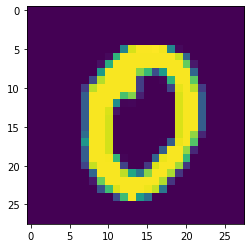

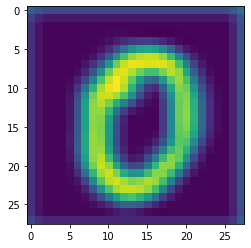

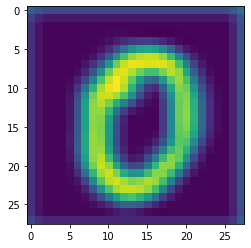

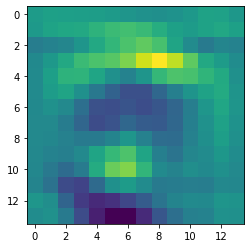

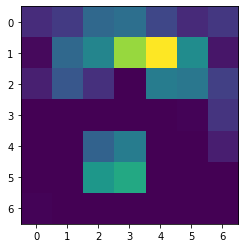

In [ ]:
image = 0
filter = 4

activation_layers = ['model5_conv1', 'model5_conv1_Relu', 'model5_conv2' ,'model5_conv2_maxpooled']

def conv_image(model, batch, batch_labels, layer_num, channel_num, after_activation = True, print_original = False):
  if after_activation:
    img = images[0:1]
    predictions = model5(img)
    score, predicted = torch.max(predictions, 1)

    if print_original:
      plt.figure()
      org_img = (images[0].cpu().numpy())
      org_img = np.squeeze(org_img)
      plt.imshow(org_img)
      print("label: "+ str(batch_labels[0]))
      print("predicted: "+ str(predicted[0]))
      print("-----------------")
      print("first img is the original, the following 4 are from the convo layers")
      print("-----------------")

    plt.figure()
    imgplot = plt.imshow(activation[activation_layers[layer_num]][channel_num][filter].cpu())
  else:
    print("the hook layer isn't activated!")


for batch_idx, (images, labels) in enumerate(test_loaders[0]):
  images = images/255 # normalization
  images, labels = images.to(device), labels.to(device)
  conv_image(model5, images, labels, 0, 0, True, True)
  conv_image(model5, images, labels, 1, 0, True)
  conv_image(model5, images, labels, 2, 0, True)
  conv_image(model5, images, labels, 3, 0, True)
  break

label: tensor(8)
predicted: tensor(8)
-----------------
first img is the original, the following 4 are from the convo layers
-----------------


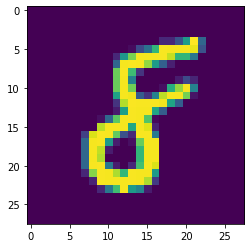

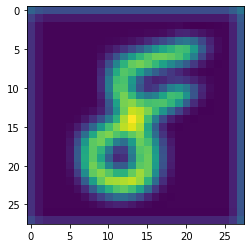

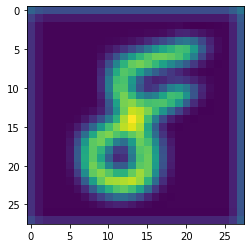

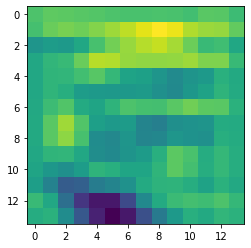

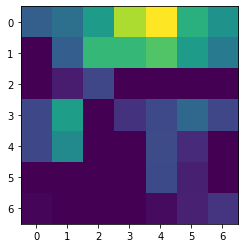

In [ ]:
for batch_idx, (images, labels) in enumerate(test_loaders[0]):
  images = images/255 # normalization
  images, labels = images.to(device), labels.to(device)
  conv_image(model5, images, labels, 0, 0, True, True)
  conv_image(model5, images, labels, 1, 0, True)
  conv_image(model5, images, labels, 2, 0, True)
  conv_image(model5, images, labels, 3, 0, True)
  break

label: tensor(8)
predicted: tensor(8)
-----------------
first img is the original, the following 4 are from the convo layers
-----------------


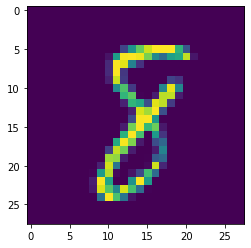

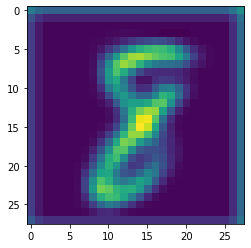

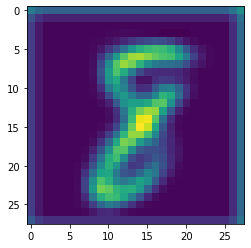

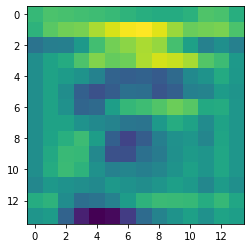

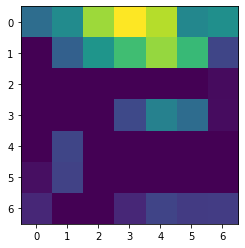

In [ ]:
for batch_idx, (images, labels) in enumerate(test_loaders[0]):
  images = images/255 # normalization
  images, labels = images.to(device), labels.to(device)
  conv_image(model5, images, labels, 0, 0, True, True)
  conv_image(model5, images, labels, 1, 0, True)
  conv_image(model5, images, labels, 2, 0, True)
  conv_image(model5, images, labels, 3, 0, True)
  break

label: tensor(4)
predicted: tensor(4)
-----------------
first img is the original, the following 4 are from the convo layers
-----------------


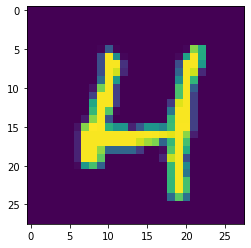

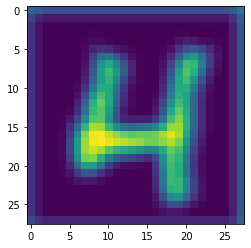

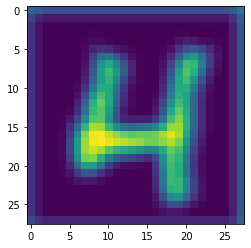

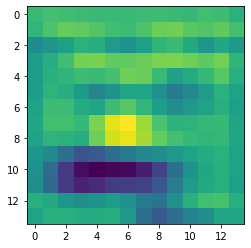

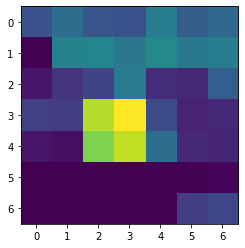

In [ ]:
for batch_idx, (images, labels) in enumerate(test_loaders[0]):
  images = images/255 # normalization
  images, labels = images.to(device), labels.to(device)
  conv_image(model5, images, labels, 0, 0, True, True)
  conv_image(model5, images, labels, 1, 0, True)
  conv_image(model5, images, labels, 2, 0, True)
  conv_image(model5, images, labels, 3, 0, True)
  break